<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/challenges/challenge-one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

Libraries and packages used in the project

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

np.random.seed(99)

### 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

import del dataset

In [27]:
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
data = pd.read_csv("data_banknote_authentication.txt", sep=",", header=None, names=col_names)

df = pd.DataFrame(data)

In [28]:
print("Shape: ", df.shape)
df.head()

Shape:  (1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Viene fatto subito uno shuffle dei dati, in quanto il dataframe è ordinato per classi, con tutte le banconote di classe 1 in fondo

In [29]:
from sklearn.utils import shuffle

df = shuffle(df).reset_index(drop=True)

In [30]:
# features and labels
features = df.iloc[:, :-1].values
labels = df.iloc[:, 4].values

plot delle frequenze di ogni feature:

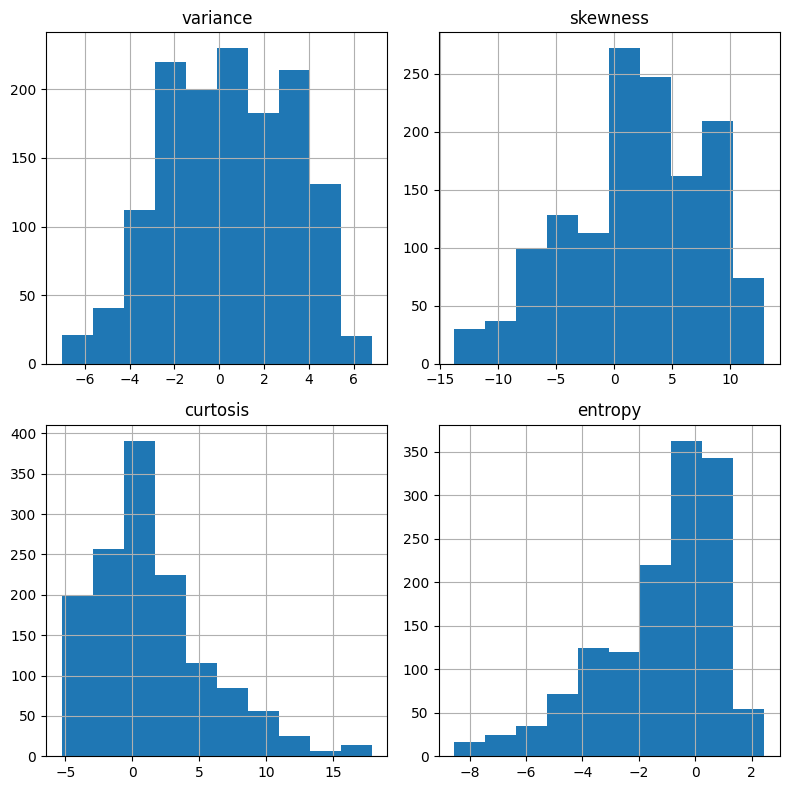

In [31]:
hist = df.iloc[:, :-1].hist(bins=10, figsize=(8, 8))
plt.tight_layout()
plt.show()

Standardizzazione dei dati, utile anche per gli algoritmi usati in seguito, come ad esempio PCA

In [32]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(features)
X_scaled = scaler.transform(features)

df_fin = pd.DataFrame(np.c_[X_scaled, labels], columns=col_names)
df_fin['class'] = df_fin['class'].astype(int)

features_Sc = df_fin.iloc[:, :-1].values

df_fin.head()

,variance,skewness,curtosis,entropy,class
0,-1.055251,-1.314535,1.071049,0.589752,1
1,-0.235714,1.261269,0.170147,-1.517747,0
2,-2.230030,0.791822,-0.167349,-2.613046,1
3,-0.691810,-1.196363,1.225559,0.650703,1
4,-0.177793,0.310018,-1.378481,-1.457420,1


Plot della confusion matrix per vedere la correlazione tra le variabili

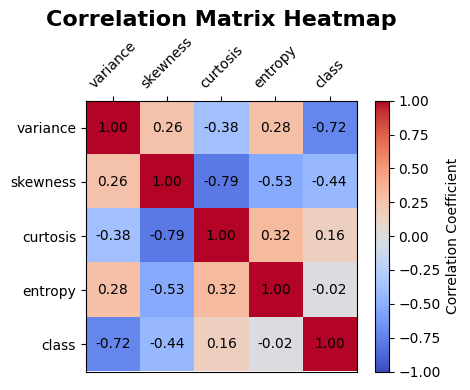

In [33]:
correlation_matrix = np.corrcoef(df, rowvar=False)
feature_names = col_names 

plt.figure(figsize=(5, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='equal', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f"{correlation_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='center')  # allign
plt.yticks(range(len(feature_names)), feature_names)
ax = plt.gca()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

plt.title("Correlation Matrix Heatmap",fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

le correlazioni maggiori tra le variabili sono:
- class e variance
- curtosis e skewness 

In [34]:
data = pd.DataFrame({
    'variance': X_scaled[:, 0],
    'skewness': X_scaled[:, 1],
    'curtosis': X_scaled[:, 2],
    'Classes': labels.astype(str)
})

fig = px.scatter_3d(data, x='variance', y='skewness', z='curtosis', color='Classes', title='data visualization', opacity=0.6, width=700, height=600 )
fig.update_layout(scene_camera=dict(eye=dict(x=1.4, y=-1.4, z=0.14)))
fig.update_traces(marker=dict(size=5))
fig.show()

### 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

**PCA**

In [35]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_scaled)
projection = pca.transform(X_scaled)

projection

array([[-1.99058065, -0.51938351, -0.29362852, -0.1346191 ],
       [ 1.2390155 , -1.23277318,  0.71217345,  0.64558891],
       [ 1.07932639, -3.35886306,  0.05066893, -0.08098792],
       ...,
       [-0.42474729,  0.28928499, -0.87599149, -0.30123935],
       [-2.81923077, -1.1851906 ,  0.54405524,  0.32781908],
       [ 0.24328859,  0.34654488, -0.16151203,  0.67724508]])

Plot dello spettro degli autovalori e della varianza spiegata, per ogni Principal Component

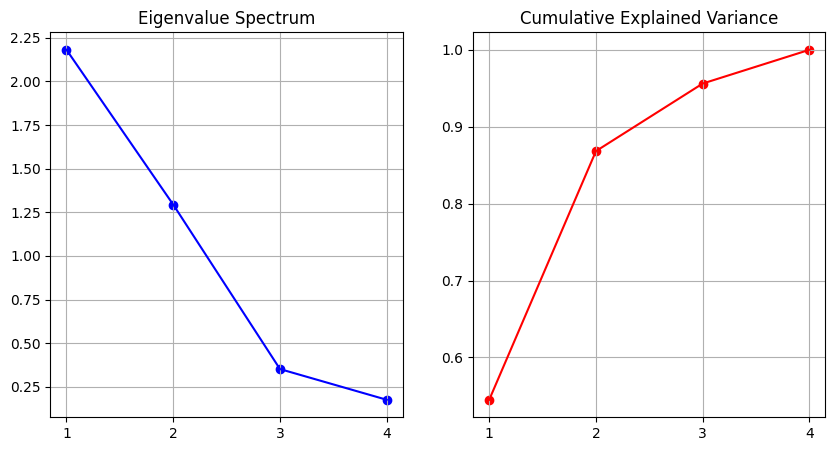

In [36]:
cumulative_variance = np.zeros(X_scaled.shape[1])
for i in range(X_scaled.shape[1]):
    cumulative_variance[i] = np.sum(pca.explained_variance_ratio_[:i+1])

eigenvalues = pca.explained_variance_
components = np.arange(X_scaled.shape[1]) + 1

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Eigenvalue Spectrum')
ax1.scatter(components, eigenvalues, color='b', label='Eigenvalues')
ax1.plot(components, eigenvalues, color='b')
ax1.set_xticks(components)
ax1.grid(True)

ax2.set_title('Cumulative Explained Variance')
ax2.scatter(components, cumulative_variance, color='r', label='Cumulative Variance')
ax2.plot(components, cumulative_variance, color='r')
ax2.set_xticks(components)
ax2.grid(True)

plt.show()

Scatterplot: rappresentazione 2D del dataset, usando le prime 2 componenti principali<br>

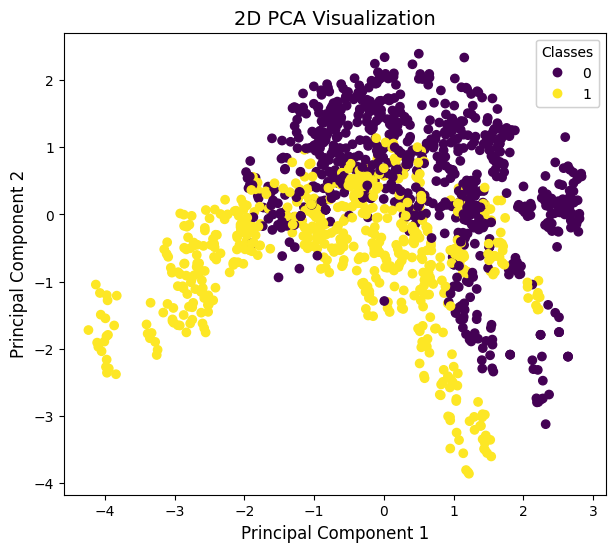

In [37]:
fig, ax = plt.subplots(figsize=(7, 6))

scatter = ax.scatter(projection[:, 0], projection[:, 1], c=labels)

ax.set_title('2D PCA Visualization', fontsize=14)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)

legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.show()

Considerando le prime 2 componenti principali, le classi non sono ben distinguibili in maniera precisa con una separazione lineare. <br>
Infatti i cluster non sono distinti e parecchi punti di classi diverse si sovrappongono. Anche tracciando una liea curva si ottiene una divisione imprecisa. 

Scatterplot: rappresentazione 3D del dataset, usando le prime 3 componenti principali<br>

In [38]:
data = pd.DataFrame({
    'PC1': projection[:, 0],
    'PC2': projection[:, 1],
    'PC3': projection[:, 2],
    'Classes': labels.astype(str)
})

fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='Classes', title='3D PCA Visualization', opacity=0.6, width=700, height=600 )

fig.update_layout(scene=dict(aspectmode="manual", aspectratio=dict(x=1, y=1, z=1)))

fig.update_layout(scene_camera=dict(eye=dict(x=1.4, y=-1.4, z=0.14)))
fig.update_traces(marker=dict(size=5))
fig.show()

Possiamo vedere che nel plot delle prime 3 componenti principali i dati sono più raggruppati, e le due classi sembrano più divise

**k-MEANS CON 2 CLUSTERS**

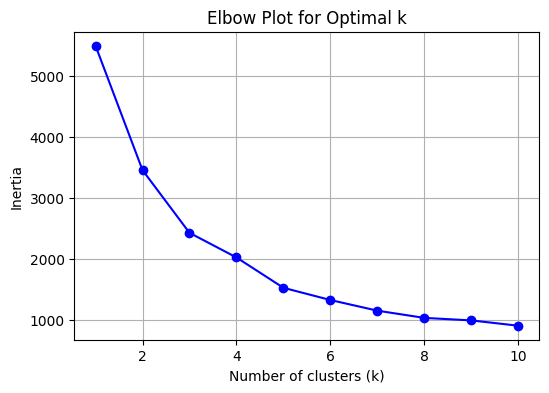

In [39]:
from sklearn.cluster import KMeans

inertia = [] # within-cluster sum of squares
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()

notiamo un cambio di concavità nel punto k=2, che coincide con le classi di banconote vere e false

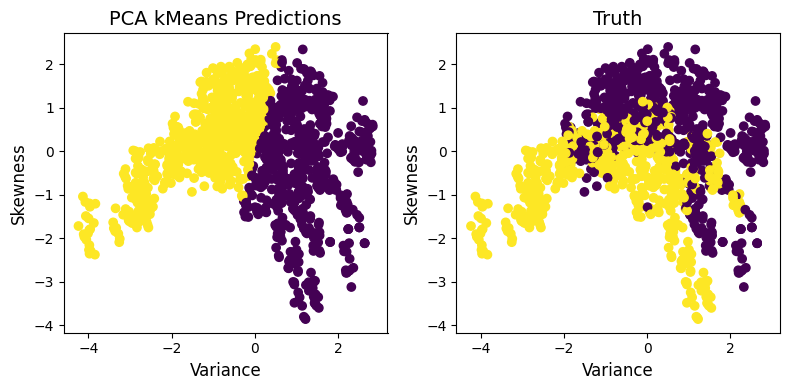

In [40]:
kmeansB = KMeans(n_clusters=2, random_state=0, n_init=20).fit(projection[:, [0,1]])

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(8, 4))
ax1.scatter(projection[:, 0], projection[:, 1], c=kmeansB.labels_)
ax1.set_title('PCA kMeans Predictions', fontsize=14)
ax1.set_xlabel('Variance', fontsize=12)
ax1.set_ylabel('Skewness', fontsize=12)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax2.scatter(projection[:, 0], projection[:, 1], c=labels)
ax2.set_title('Truth', fontsize=14)
ax2.set_xlabel('Variance', fontsize=12)
ax2.set_ylabel('Skewness', fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20).fit(projection[:, [0, 1, 2]])

data = pd.DataFrame({
    'PC1': projection[:, 0],
    'PC2': projection[:, 1],
    'PC3': projection[:, 2],
    'Classes': kmeans.labels_.astype(str)
})

fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='Classes', title='3D PCA kMeans', opacity=0.6, width=700, height=600 )

fig.update_layout(scene=dict(aspectmode="manual", aspectratio=dict(x=1, y=1, z=1)))

fig.update_layout(scene_camera=dict(eye=dict(x=1.4, y=-1.4, z=0.14)))
fig.update_traces(marker=dict(size=5))
fig.show()

In [42]:
correct=0
for i in range(0,len(X_scaled)):
    if labels[i]==kmeans.labels_[i]:
        correct=correct+1

from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}')
print(f'Accuracy: {correct/len(X_scaled)}')

Silhouette Score: 0.32919370128308034
Accuracy: 0.5583090379008746


Si nota che kMeans con le componenti di PCA non identifica i cluster in modo chiaro, e ci sono un numero elevato di punti sulla frontiera. Questo anche per il fatto che PCA non crea dei cluster divisibili linearmente.<br>
Si prova quindi ad eseguire kMeans sul dataset non trasformato da PCA: Inizialmenre con le prime due variabili del dataset che sono anche le più correlate (Variance e Skewness)

In [43]:
X_troncato = X_scaled[:, [0,1]]

kmeansG = KMeans(n_clusters=2, random_state=0, n_init=20).fit(X_troncato)

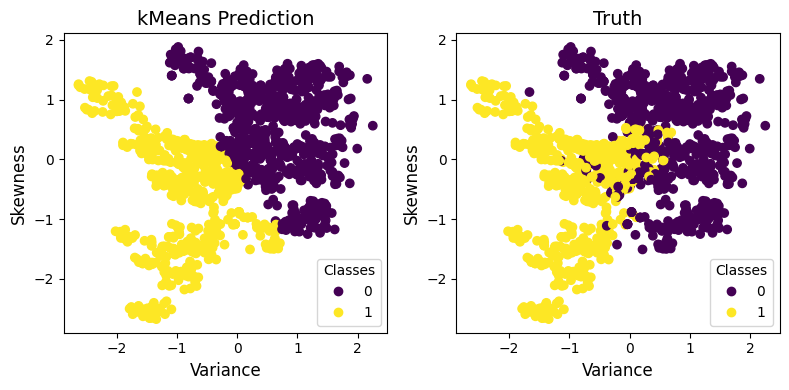

In [44]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(8, 4))

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeansG.labels_)
ax1.set_title('kMeans Prediction', fontsize=14)
ax1.set_xlabel('Variance', fontsize=12)
ax1.set_ylabel('Skewness', fontsize=12)
legend = ax1.legend(*scatter.legend_elements(), title="Classes")

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
ax2.set_title('Truth', fontsize=14)
ax2.set_xlabel('Variance', fontsize=12)
ax2.set_ylabel('Skewness', fontsize=12)
legend = ax2.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

si nota che in variance skewness il confine dei due cluster (frontiera) contiene un numero minore di punti.
"il confine sono 2 sfere e non una retta" <br>
questo anche perché le variabili più correlate con la class sono variance e skewness (rispettivamente -0.72 e -0.44)
<br><br>
I risultati ottenuti senza l'utilizzo di PCA hanno un accuratezza più elevata:

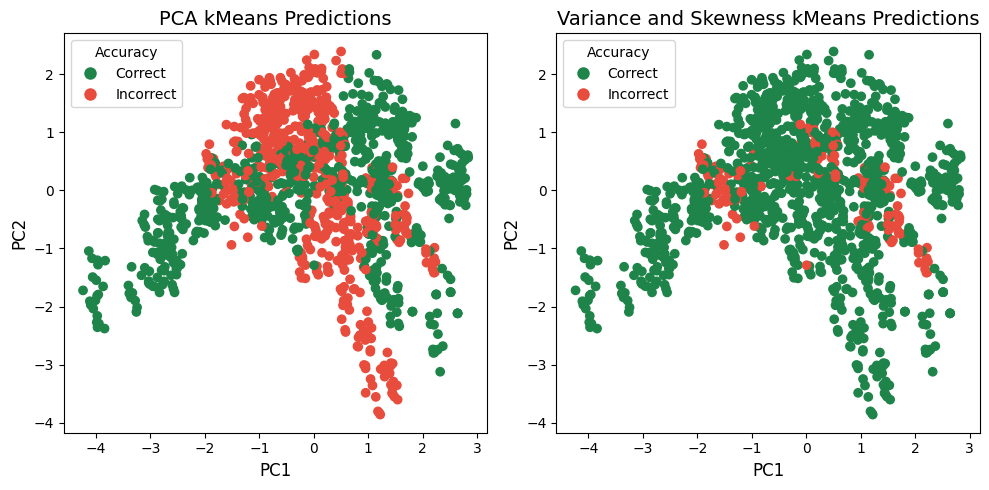

In [64]:
correct_B = (kmeansB.labels_ == labels)
correct_G = (kmeansG.labels_ == labels)

colors_B = np.where(correct_B, '#1E8449', '#E74C3C')
colors_G = np.where(correct_G, '#1E8449', '#E74C3C')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

scatter1 = ax1.scatter(projection[:, 0], projection[:, 1], c=colors_B)
ax1.set_title('PCA kMeans Predictions', fontsize=14)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='#1E8449', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Incorrect', markerfacecolor='#E74C3C', markersize=10)
], title="Accuracy", loc='upper left')

scatter2 = ax2.scatter(projection[:, 0], projection[:, 1], c=colors_G)
ax2.set_title('Variance and Skewness kMeans Predictions', fontsize=14)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)

ax2.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='#1E8449', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Incorrect', markerfacecolor='#E74C3C', markersize=10)
], title="Accuracy", loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
correct=0
for i in range(0,len(X_scaled)):
    if labels[i]==kmeans.labels_[i]:
        correct=correct+1

from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}')
print(f'Accuracy: {correct/len(X_scaled)}')

Silhouette Score: 0.32919370128308034
Accuracy: 0.5583090379008746


silhouette score basso, kmeans potrebbe non essere il miglior metodo di divisione, anche perché i cluster non sono sferici

**t-SNE**

n_components: dimensionalità dello spazio (3 componenti) <br>
perplexity: varianza della distribuzione che indica se un punto è nella neighbourhood

In [47]:
from sklearn.manifold import TSNE

X_embedded_2 = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=70).fit_transform(X_scaled)

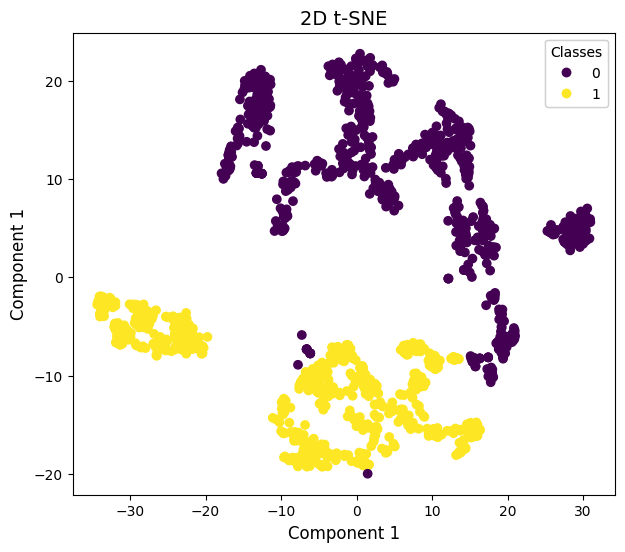

In [48]:
fig, ax = plt.subplots(figsize=(7, 6))

scatter = ax.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], c=labels)

ax.set_title('2D t-SNE', fontsize=14)
ax.set_xlabel('Component 1', fontsize=12)
ax.set_ylabel('Component 1', fontsize=12)

legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.show()

In [49]:
X_embedded_3 = TSNE(n_components=3, learning_rate='auto', init='pca', perplexity=300).fit_transform(X_scaled)

In [50]:
data = pd.DataFrame({
    'dim 1': X_embedded_3[:, 0],
    'dim 2': X_embedded_3[:, 1],
    'dim 3': X_embedded_3[:, 2],
    'Classes': labels.astype(str)
})

fig = px.scatter_3d(data, x='dim 1', y='dim 2', z='dim 3', color='Classes', title='3D t-SNE', opacity=0.6, width=700, height=600 )

fig.update_layout(
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(x=1, y=1, z=0.7)
    )
)

fig.update_traces(marker=dict(size=5))
fig.show()

Si può notare come l'algoritmo t-SNE riesca a separare meglio le due classi di banconote, questo grazie alla sua capacità di ridurre la dimensionalità di dati anche non lineari. <br>

Guardando il grafico sopra, dove i punti sono colorati con le true labels, si può notare che rispetto alla riduzione di dimensionalità effettuata da PCA, possiamo distinguere in modo più chiaro le banconote di classe 0 da quelle di classe 1

**DBSCAN**

massimizzare il numero di oggetti vicini: <br>
eps: raggio del cluster <br>
min_samples: numero di punti minimo per creare un cluster <br>

per trovare un buon valore di eps vado a vedere il K-NN dist plot 

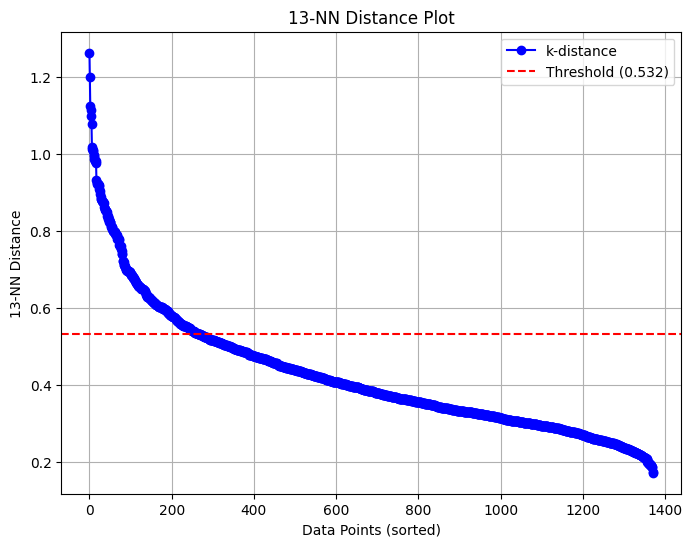

In [51]:
from sklearn.neighbors import NearestNeighbors

k = 13
eps = 0.532
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k - 1])[::-1]

plt.figure(figsize=(8, 6))
plt.plot(k_distances, marker='o', linestyle='-', color='blue', label='k-distance')
plt.axhline(y=eps, color='red', linestyle='--', label=f'Threshold ({eps})')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-NN Distance')
plt.title(f'{k}-NN Distance Plot')
plt.legend()
plt.grid(True)
plt.show()

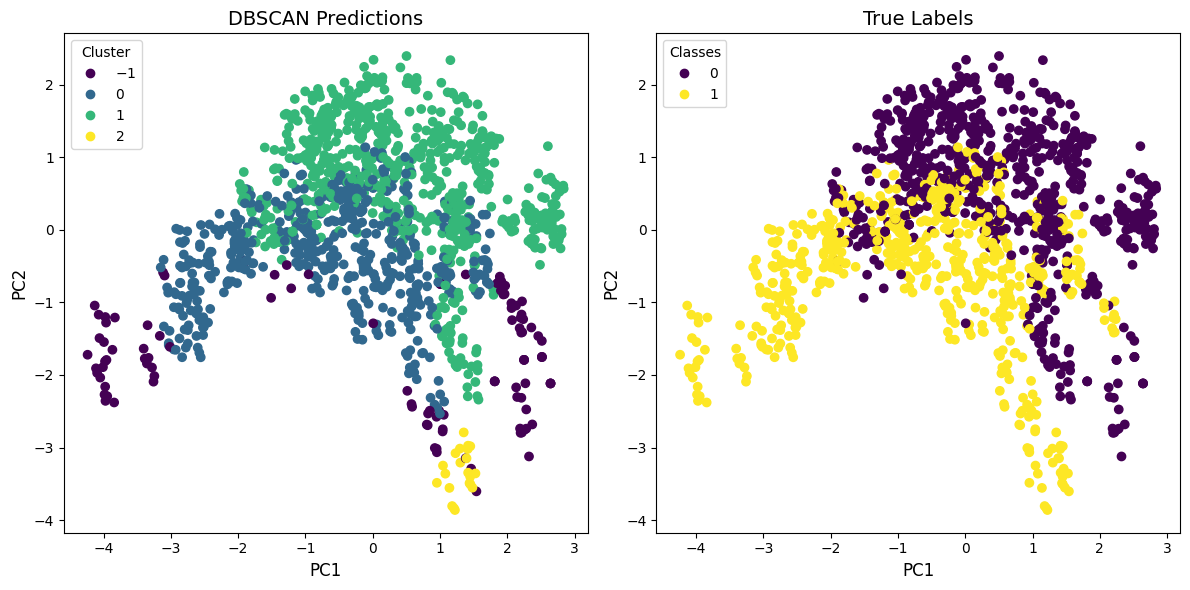

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.532, min_samples=13).fit(X_scaled)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = ax1.scatter(projection[:, 0], projection[:, 1], c=dbscan.labels_)
legend1 = ax1.legend(*scatter1.legend_elements(), title="Cluster", loc='upper left')
ax1.set_title('DBSCAN Predictions', fontsize=14)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)

scatter2 = ax2.scatter(projection[:, 0], projection[:, 1], c=labels)
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes", loc='upper left')
ax2.set_title('True Labels', fontsize=14)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)

plt.tight_layout()
plt.show()

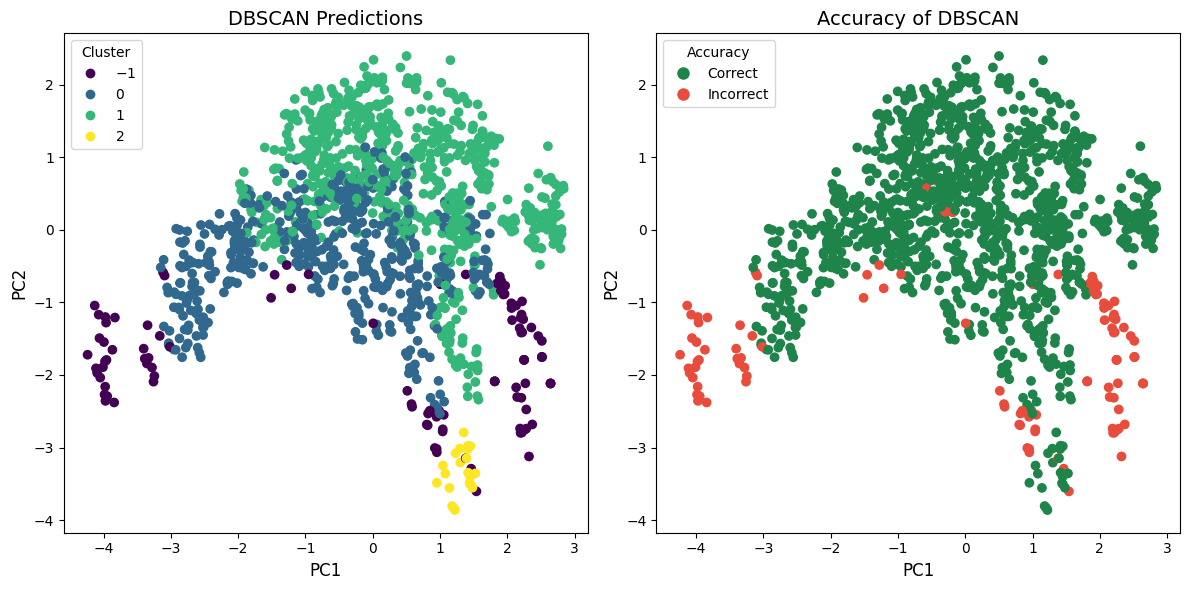

In [90]:
correct_predictions = ((labels == 0) & (dbscan.labels_ == 1) | (labels == 1) & ((dbscan.labels_ == 0) | (dbscan.labels_ == 2)))

colors_true = np.where(correct_predictions, '#1E8449', '#E74C3C')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = ax1.scatter(projection[:, 0], projection[:, 1], c=dbscan.labels_, cmap='viridis')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Cluster", loc='upper left')
ax1.set_title('DBSCAN Predictions', fontsize=14)
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
scatter2 = ax2.scatter(projection[:, 0], projection[:, 1], c=colors_true)
ax2.set_title('Accuracy of DBSCAN', fontsize=14)
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='#1E8449', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Incorrect', markerfacecolor='#E74C3C', markersize=10)
], title="Accuracy", loc='upper left')


plt.tight_layout()
plt.show()

Con eps=0.532 e minpts=13 ottengo 3 cluster che coincidono quasi perfettamente con le variabili target, e sono presenti pochi punti di noise. <br>
In particolare la class 0 è riconosciuta perfettamente dal cluster 1
La calss 1 è inserita nei cluster 0 e 2

### 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN. 

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed. 

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     


**Divisione del Dataset in train e test**

In [65]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report

# train / test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=372, random_state=34)
print("Dimension of the training set: {}".format(X_train.shape))

# k-Fold
kf = KFold(n_splits=5, random_state=37, shuffle=True)

print(kf.get_n_splits(X_train), "fold")

Dimension of the training set: (1000, 4)
5 fold


l'oggetto kf sarà usato in seguito per trovare i migliori iperparametri di regolarizzazione della logistic regression, per settare i parametri di decision tree e knn classifier

**LOGISTIC REGRESSION**

In [80]:
from sklearn.linear_model import LogisticRegression

LR_model_1 = LogisticRegression(random_state=0, penalty=None) # iperparametri di default

LR_model_1.fit(X_train, y_train)
LR_predictions_1 = LR_model_1.predict(X_test)

print(classification_report(y_test, LR_predictions_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.99      0.99      0.99       164

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



L'accuracy è già buona con i parametri di default e senza nessuna regolarizzazione, nel seguente codice si cerca di ottimizzare ulteriormente:

In [67]:
LR_model = LogisticRegression(max_iter=1000, random_state=90)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # regularization parameter
    'penalty': ['l1', 'l2'], # regularization type
    'solver': ['liblinear'], # solver
}

grid_search = GridSearchCV(
    estimator=LR_model,
    param_grid=param_grid,
    scoring='accuracy',  # evaluation metric
    cv=kf,               # K-Fold cross validation
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
LR_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}\n\n")

LR_predictions = LR_model.predict(X_test)

print(classification_report(y_test, LR_predictions))

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.99      0.99      0.99       164

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



il miglioramento è minimo nel modello con regolarizzazione L1 e parametro di regolarizzazione=10

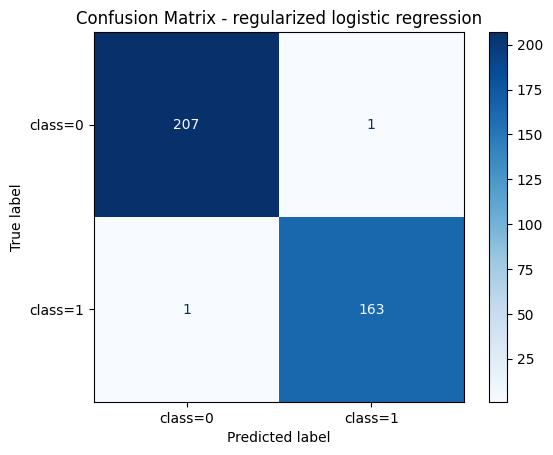

<Figure size 100x100 with 0 Axes>

In [68]:
cm = metrics.confusion_matrix(y_test, LR_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class=0", "class=1"])

disp.plot(cmap='Blues')

plt.title('Confusion Matrix - regularized logistic regression')
plt.figure(figsize=(1, 1))
plt.show()

**ID3 DECISION TREE**

ricavare il miglior metrica tra gini ed entropy come criterion

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

gini_model = DecisionTreeClassifier(criterion="gini", random_state=42)
entropy_model = DecisionTreeClassifier(criterion="entropy", random_state=42)

scores_gini = cross_val_score(gini_model, X_train, y_train, cv=kf)
scores_entropy = cross_val_score(entropy_model, X_train, y_train, cv=kf)

print(f"Gini Mean Accuracy: {scores_gini.mean():.4f}")
print(f"Entropy Mean Accuracy: {scores_entropy.mean():.4f}")

Gini Mean Accuracy: 0.9680
Entropy Mean Accuracy: 0.9910


Si sceglie la metrica "entropy", anche per creaere un albero più bilanciato

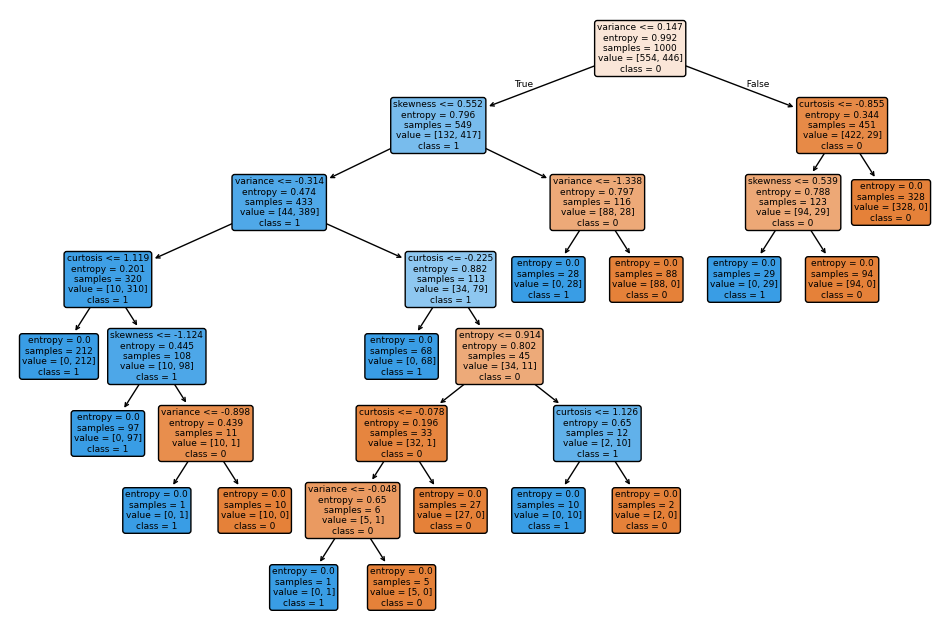

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       208
           1       0.99      0.98      0.98       164

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372



In [70]:
from sklearn.tree import plot_tree

feature_names = ["variance", "skewness", "curtosis", "entropy"]

DT_model = DecisionTreeClassifier(criterion="entropy", random_state=0)
DT_model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(
    DT_model,
    feature_names=feature_names,
    class_names=[str(cls) for cls in np.unique(y_train)],
    filled=True,
    rounded=True
)
plt.show()

DT_predictions = DT_model.predict(X_test)
print(classification_report(y_test, DT_predictions))

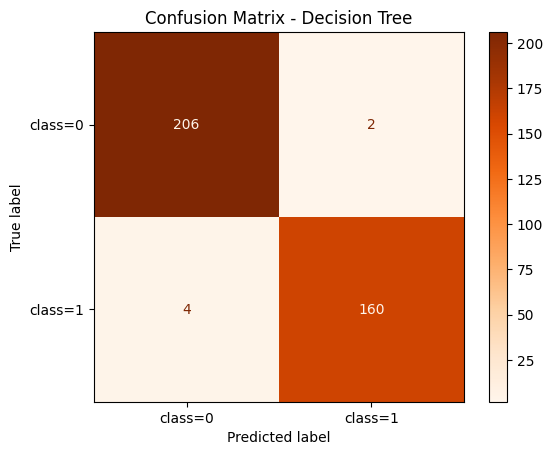

<Figure size 100x100 with 0 Axes>

In [71]:
cm = metrics.confusion_matrix(y_test, DT_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class=0", "class=1"])

disp.plot(cmap='Oranges')

plt.title('Confusion Matrix - Decision Tree')
plt.figure(figsize=(1, 1))
plt.show()

**NAIVE BAYES**

In [72]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_predictions = GNB_model.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, GNB_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       208
           1       0.85      0.82      0.83       164

    accuracy                           0.85       372
   macro avg       0.85      0.85      0.85       372
weighted avg       0.85      0.85      0.85       372



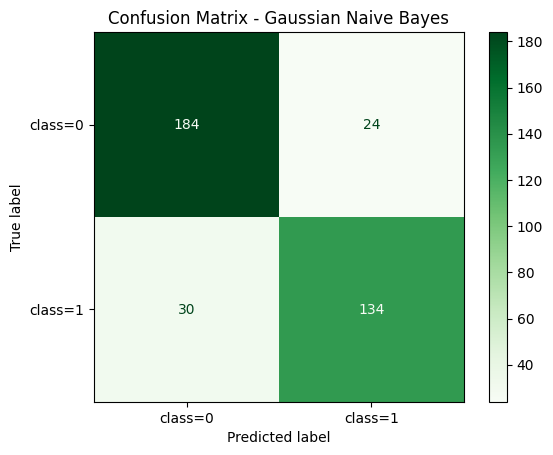

<Figure size 100x100 with 0 Axes>

In [73]:
cm = metrics.confusion_matrix(y_test, GNB_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class=0", "class=1"])

disp.plot(cmap='Greens')

plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.figure(figsize=(1, 1))
plt.show()

I risultati di Gaussian Naive Bayes sono peggiori rispetto agli altri modelli testati fin'ora

**K-NEAREST NEIGHBOUR**

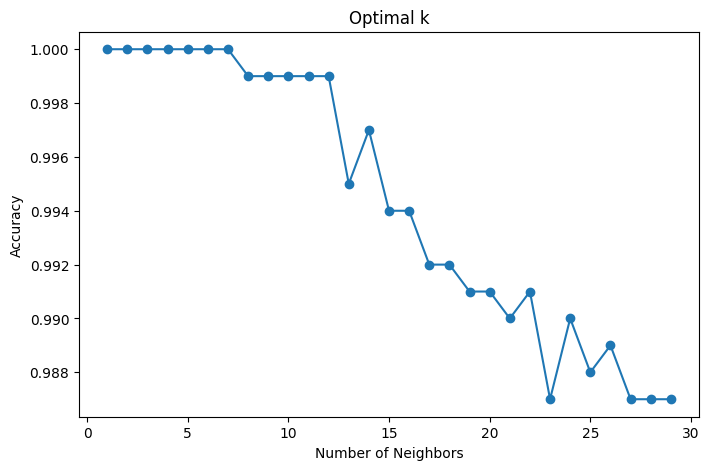

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 30))
accuracy_scores = []

for k in k_values:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(KNN_model, X_train, y_train, cv=kf, scoring='accuracy')
    accuracy_scores.append(knn_scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Optimal k")
plt.show()

Dal grafico si vede che per valori di k superiori a 10 l'accuratezza cala notevolmente dato che la neighbourhood contiene anche punti di altre classi. <br>
Si sceglie un valore di K uguale a 7 in modo da evitare l'overfitting con valori di k troppo bassi in cui il modello sarà troppo sensibile al rumore. 

In [75]:
KNN_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

grid_search = GridSearchCV(
    estimator=KNN_model,
    param_grid=param_grid,
    scoring='accuracy',  # evaluation metric
    cv=kf,               # K-Fold cross validation
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
KNN_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}\n")

KNN_predictions = KNN_model.predict(X_test)
print(classification_report(y_test, KNN_predictions))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       208
           1       0.99      1.00      0.99       164

    accuracy                           0.99       372
   macro avg       0.99      1.00      0.99       372
weighted avg       0.99      0.99      0.99       372



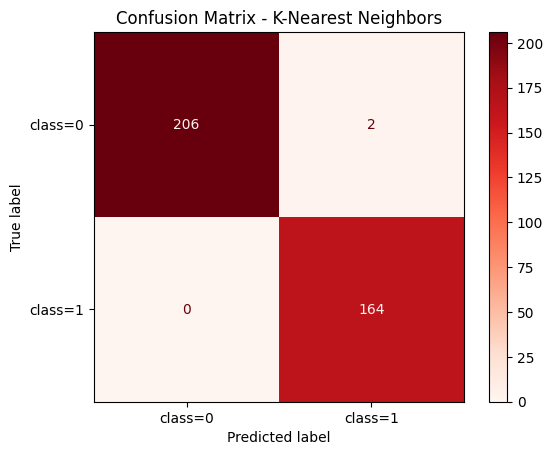

<Figure size 100x100 with 0 Axes>

In [76]:
cm = metrics.confusion_matrix(y_test, KNN_predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class=0", "class=1"])

disp.plot(cmap='Reds')

plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.figure(figsize=(1, 1))
plt.show()

**Model Comparison**

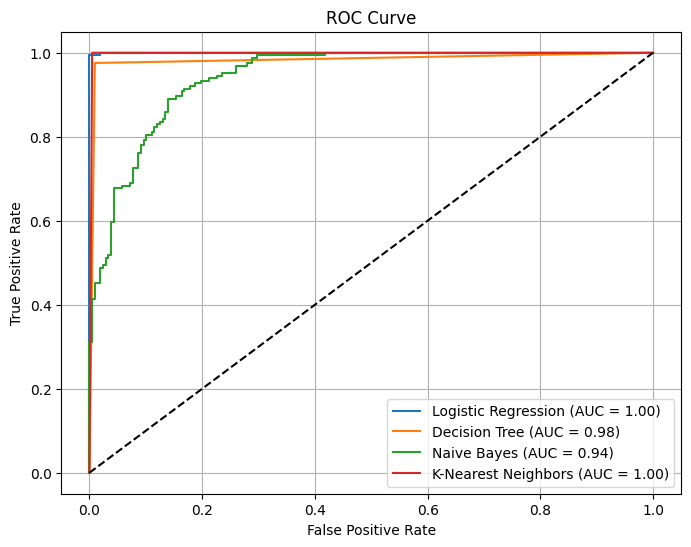

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.figure(figsize=(8, 6))

# LR
y_pred_proba_lr = LR_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_lr, 'Logistic Regression')

# DT
y_pred_proba_dt = DT_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_dt, 'Decision Tree')

# GNB
y_pred_proba_nb = GNB_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_nb, 'Naive Bayes')

# KNN
y_pred_proba_knn = KNN_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_knn, 'K-Nearest Neighbors')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Estrapolazione dei vari score per il grafico di confronto:

In [86]:
import sklearn.metrics as metrics

f1_scores = {
    'Logistic Regression': metrics.f1_score(y_test, LR_predictions_1),
    'Regularized LR': metrics.f1_score(y_test, LR_predictions),
    'Decision Tree': metrics.f1_score(y_test, DT_predictions),
    'Gaussian Naive Bayes': metrics.f1_score(y_test, GNB_predictions),
    'K-Nearest Neighbors': metrics.f1_score(y_test, KNN_predictions)
}

accuracy_scores = {
    'Logistic Regression': metrics.accuracy_score(y_test, LR_predictions_1),
    'Regularized LR': metrics.accuracy_score(y_test, LR_predictions),
    'Decision Tree': metrics.accuracy_score(y_test, DT_predictions),
    'Gaussian Naive Bayes': metrics.accuracy_score(y_test, GNB_predictions),
    'K-Nearest Neighbors': metrics.accuracy_score(y_test, KNN_predictions)
}

precision_scores = {
    'Logistic Regression': metrics.precision_score(y_test, LR_predictions_1),
    'Regularized LR': metrics.precision_score(y_test, LR_predictions),
    'Decision Tree': metrics.precision_score(y_test, DT_predictions),
    'Gaussian Naive Bayes': metrics.precision_score(y_test, GNB_predictions),
    'K-Nearest Neighbors': metrics.precision_score(y_test, KNN_predictions)
}

recall_scores = {
    'Logistic Regression': metrics.recall_score(y_test, LR_predictions_1),
    'Regularized LR': metrics.recall_score(y_test, LR_predictions),
    'Decision Tree': metrics.recall_score(y_test, DT_predictions),
    'Gaussian Naive Bayes': metrics.recall_score(y_test, GNB_predictions),
    'K-Nearest Neighbors': metrics.recall_score(y_test, KNN_predictions)
}

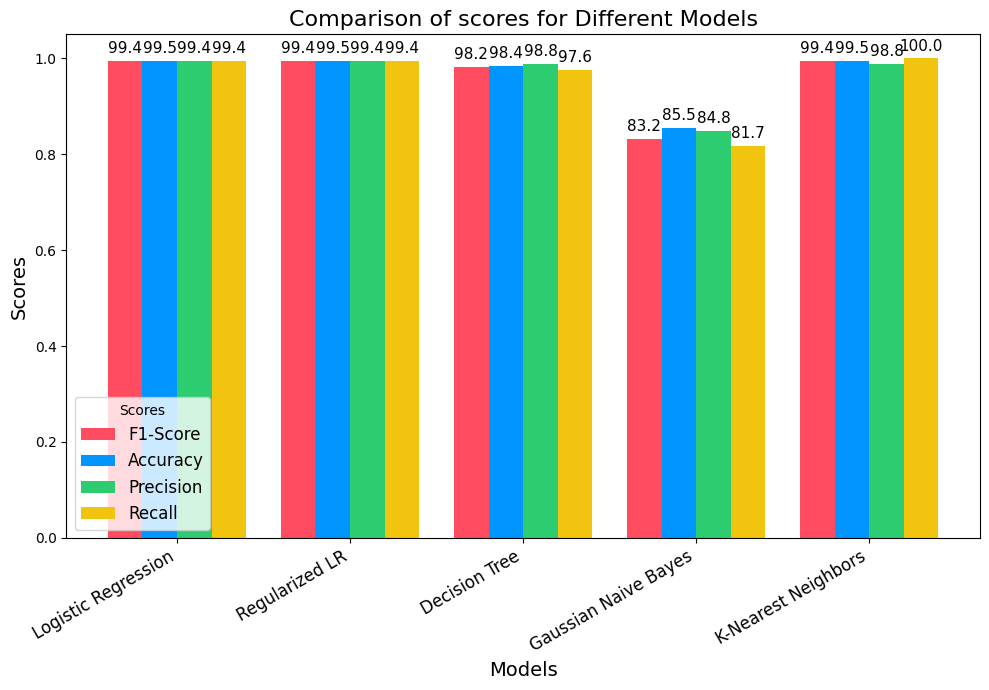

In [88]:
models = list(f1_scores.keys())
metrics = ['F1-Score', 'Accuracy', 'Precision', 'Recall']
width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#FF4C61', '#0095FF', '#2ECC71', '#F1C40F']

# bars
for i, metric in enumerate(metrics):
    if metric == 'F1-Score':
        metric_scores = [f1_scores[model] for model in models]
    elif metric == 'Accuracy':
        metric_scores = [accuracy_scores[model] for model in models]
    elif metric == 'Precision':
        metric_scores = [precision_scores[model] for model in models]
    elif metric == 'Recall':
        metric_scores = [recall_scores[model] for model in models]

    bars = ax.bar(x + i * width, metric_scores, width, label=metric, color=colors[i])

    # percentages
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height * 100:.1f}', 
                ha='center', va='bottom', fontsize=11)

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Comparison of scores for Different Models', fontsize=16)
ax.set_xticks(x + width * 1.5)  # alignment and make diagonal
ax.set_xticklabels(models, fontsize=12, rotation=30, ha='right')
ax.set_xticklabels(models, fontsize=12)
ax.legend(title="Scores", fontsize=12)
plt.tight_layout()
plt.show()